In [48]:
# Tests performed on single standard_nc12s_v3
# All default parameters
# Init time: max_seq_len=128, max_batch_size=4, 
# Runtime: max_gen_len=None, temperature=0.6, top_p=0.9
# Stats on llama-7b-chat
!pip install pandas matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [49]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
def plot_latency_per_request(df, mean_latency, std_dev, model_name): 
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(df['request_num'], df['latency'], label='Latency', marker='o')
    plt.axhline(mean_latency, color='r', linestyle='dashed', linewidth=1, label=f'Mean: {mean_latency:.2f}')
    plt.axhline(mean_latency + std_dev, color='g', linestyle='dashed', linewidth=1, label=f'+1 Std Dev: {mean_latency + std_dev:.2f}')
    plt.axhline(mean_latency - std_dev, color='g', linestyle='dashed', linewidth=1, label=f'-1 Std Dev: {mean_latency - std_dev:.2f}')
    plt.title(f'Latency of {model_name} Inference Requests')
    plt.xlabel('Request Number')
    plt.ylabel('Latency (ms)')
    plt.legend()
    plt.grid(True)
    plt.show()

In [51]:
def plot_latency_distribution(df, mean_latency, std_dev, model_name): 
    # Plotting
    plt.figure(figsize=(10, 6))

    # Plot the histogram of latencies
    plt.hist(df['latency'], bins=30, alpha=0.7, color='blue', label='Latency Distribution')

    # Mean and standard deviation lines
    plt.axvline(mean_latency, color='r', linestyle='dashed', linewidth=1, label=f'Mean: {mean_latency:.2f}')
    plt.axvline(mean_latency + std_dev, color='g', linestyle='dashed', linewidth=1, label=f'+1 Std Dev: {mean_latency + std_dev:.2f}')
    plt.axvline(mean_latency - std_dev, color='g', linestyle='dashed', linewidth=1, label=f'-1 Std Dev: {mean_latency - std_dev:.2f}')

    plt.title(f'Distribution of Latency for {model_name} Inference Requests')
    plt.xlabel('Latency (ms)')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

In [52]:
# Store each models inference results
inference_dfs = {"7B-Chat":None, "13B-Chat-1-Node": None, "13B-Chat-2-Node": None}

In [53]:
# Read the data from the 7B-Chat CSV
df = pd.read_csv('gpt-requests-7b-chat')
inference_dfs['7B-Chat'] = df
df

,run_id,request_id,request_num,latency,timestamp
0,1694204279,1694204279-1,1,4173.819542,2023-09-08 13:18:03
1,1694204279,1694204279-2,2,4649.556637,2023-09-08 13:18:08
2,1694204279,1694204279-3,3,4048.957109,2023-09-08 13:18:12
3,1694204279,1694204279-4,4,4182.111263,2023-09-08 13:18:16
4,1694204279,1694204279-5,5,4494.354010,2023-09-08 13:18:21
...,...,...,...,...,...
127,1694204279,1694204279-128,128,4540.841579,2023-09-08 13:26:14
128,1694204279,1694204279-129,129,4041.839600,2023-09-08 13:26:18
129,1694204279,1694204279-130,130,3683.495283,2023-09-08 13:26:22
130,1694204279,1694204279-131,131,3353.996515,2023-09-08 13:26:25


In [54]:
# Calculate metrics
print("7B-Chat Metrics")
mean_latency = df['latency'].mean()
std_dev = df['latency'].std()
variance = df['latency'].var()

# Display the metrics in the notebook
print(f"Mean Latency: {mean_latency}")
print(f"Standard Deviation: {std_dev}")
print(f"Variance: {variance}")

7B-Chat Metrics
Mean Latency: 3870.2613711357117
Standard Deviation: 881.1876792010596
Variance: 776491.7259757495


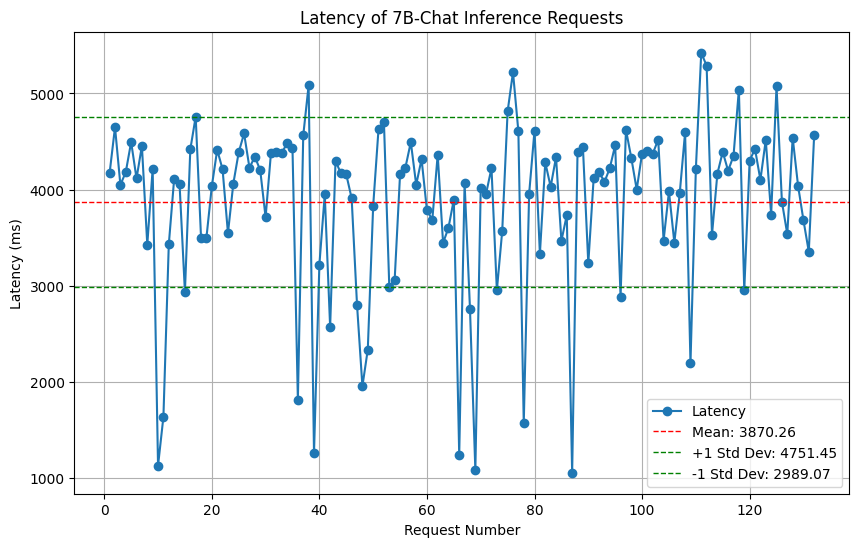

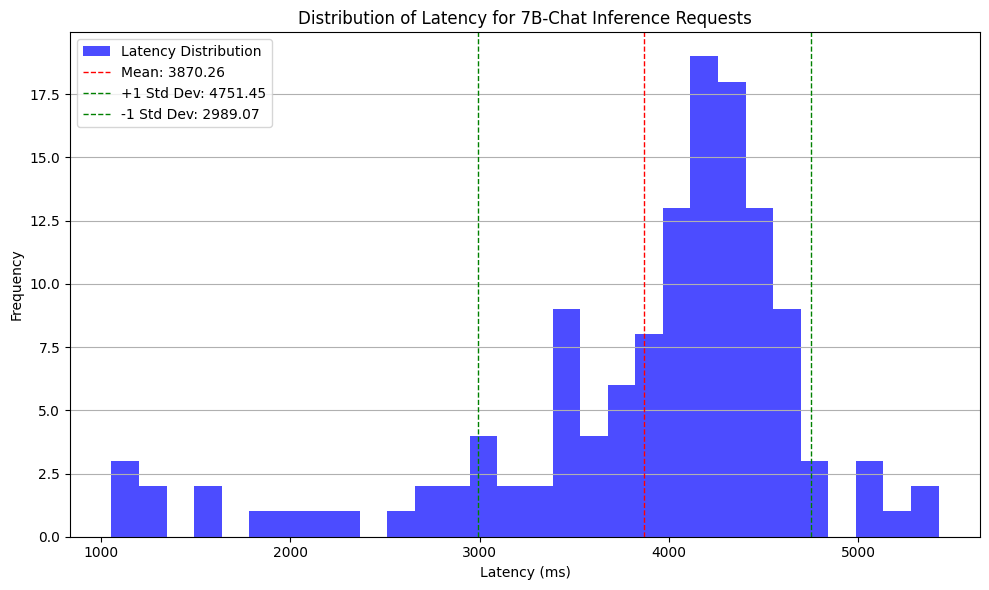

In [55]:
plot_latency_per_request(df, mean_latency, std_dev, "7B-Chat")
plot_latency_distribution(df, mean_latency, std_dev, "7B-Chat")

In [56]:
# Read the data from the 13B-Chat CSV
df = pd.read_csv('gpt-requests-13b-chat')
inference_dfs['13B-Chat-1-Node'] = df
df

,run_id,request_id,request_num,latency,timestamp
0,1694207410,1694207410-1,1,8281.563997,2023-09-08 14:10:18
1,1694207410,1694207410-2,2,7600.789547,2023-09-08 14:10:25
2,1694207410,1694207410-3,3,6856.086016,2023-09-08 14:10:32
3,1694207410,1694207410-4,4,7231.783628,2023-09-08 14:10:39
4,1694207410,1694207410-5,5,5608.877420,2023-09-08 14:10:45
...,...,...,...,...,...
127,1694207410,1694207410-128,128,7097.432852,2023-09-08 14:23:51
128,1694207410,1694207410-129,129,3818.714619,2023-09-08 14:23:55
129,1694207410,1694207410-130,130,6187.326193,2023-09-08 14:24:01
130,1694207410,1694207410-131,131,6223.877907,2023-09-08 14:24:07


In [57]:
# Calculate metrics
print("13B-Chat Metrics")
mean_latency = df['latency'].mean()
std_dev = df['latency'].std()
variance = df['latency'].var()

# Display the metrics in the notebook
print(f"Mean Latency: {mean_latency}")
print(f"Standard Deviation: {std_dev}")
print(f"Variance: {variance}")

13B-Chat Metrics
Mean Latency: 6382.9648223790255
Standard Deviation: 1176.4320112437863
Variance: 1383992.2770791003


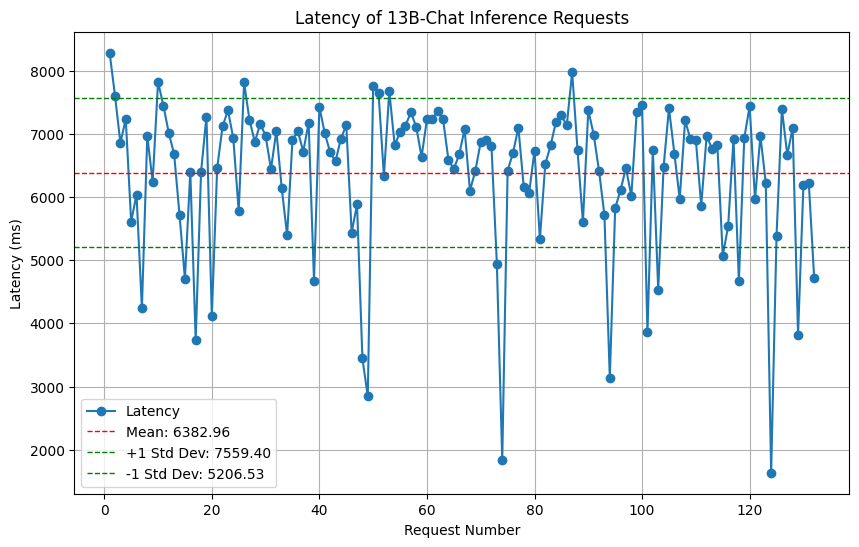

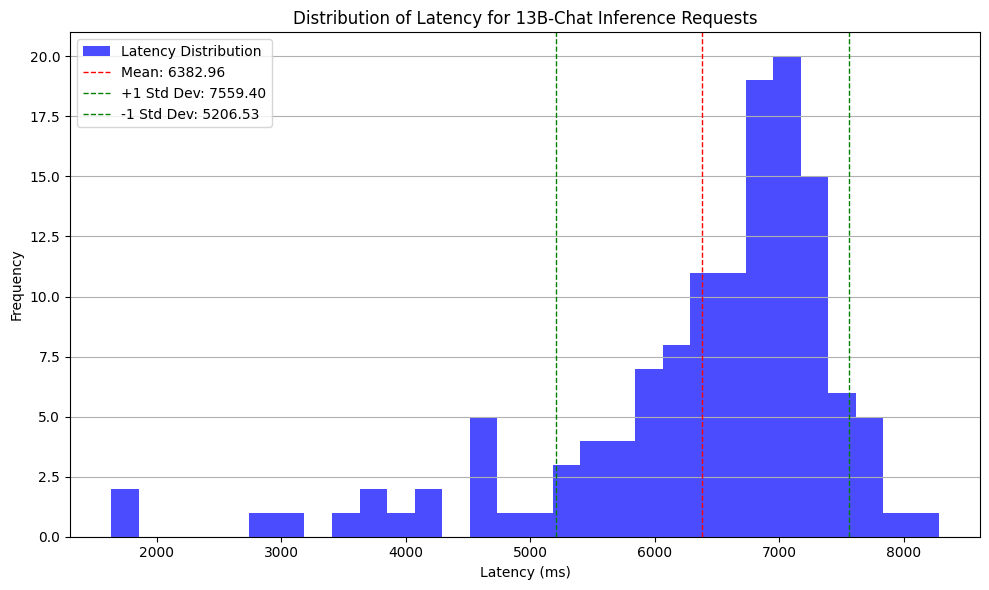

In [58]:
plot_latency_per_request(df, mean_latency, std_dev, "13B-Chat")
plot_latency_distribution(df, mean_latency, std_dev, "13B-Chat")


In [59]:
# Read the data from the 7b-chat CSV
df = pd.read_csv('gpt-requests-13b-chat-2-node')
inference_dfs['13B-Chat-2-Node'] = df
df

,run_id,request_id,request_num,latency,timestamp
0,1694209654,1694209654-1,1,15363.603115,2023-09-08 14:47:50
1,1694209654,1694209654-2,2,17139.761925,2023-09-08 14:48:07
2,1694209654,1694209654-3,3,15494.722128,2023-09-08 14:48:22
3,1694209654,1694209654-4,4,16785.407305,2023-09-08 14:48:39
4,1694209654,1694209654-5,5,21042.183638,2023-09-08 14:49:00
...,...,...,...,...,...
127,1694209654,1694209654-128,128,13451.959133,2023-09-08 15:22:21
128,1694209654,1694209654-129,129,17780.402422,2023-09-08 15:22:38
129,1694209654,1694209654-130,130,17507.225752,2023-09-08 15:22:56
130,1694209654,1694209654-131,131,17688.591003,2023-09-08 15:23:14


In [60]:
# Calculate metrics
print("13B-Chat Metrics - 2-Node")
mean_latency = df['latency'].mean()
std_dev = df['latency'].std()
variance = df['latency'].var()

# Display the metrics in the notebook
print(f"Mean Latency: {mean_latency}")
print(f"Standard Deviation: {std_dev}")
print(f"Variance: {variance}")

13B-Chat Metrics - 2-Node
Mean Latency: 16323.181690591755
Standard Deviation: 3717.650701371943
Variance: 13820926.7374113


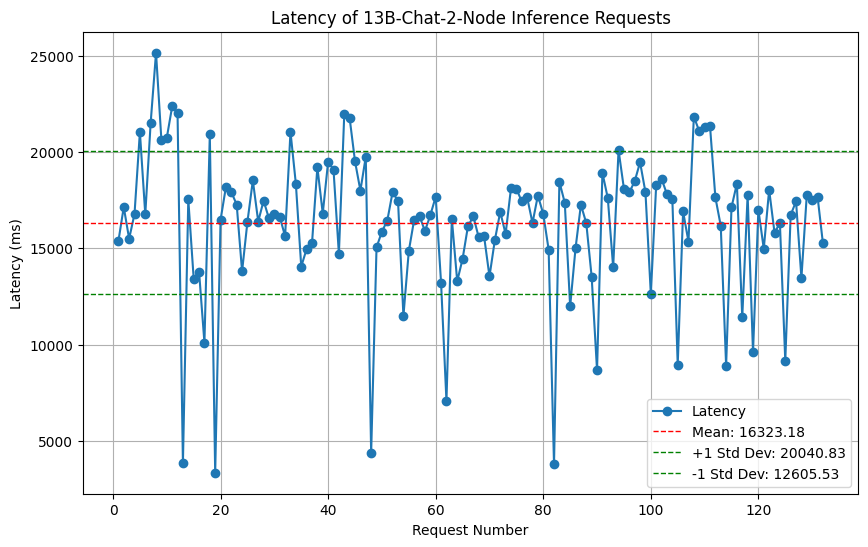

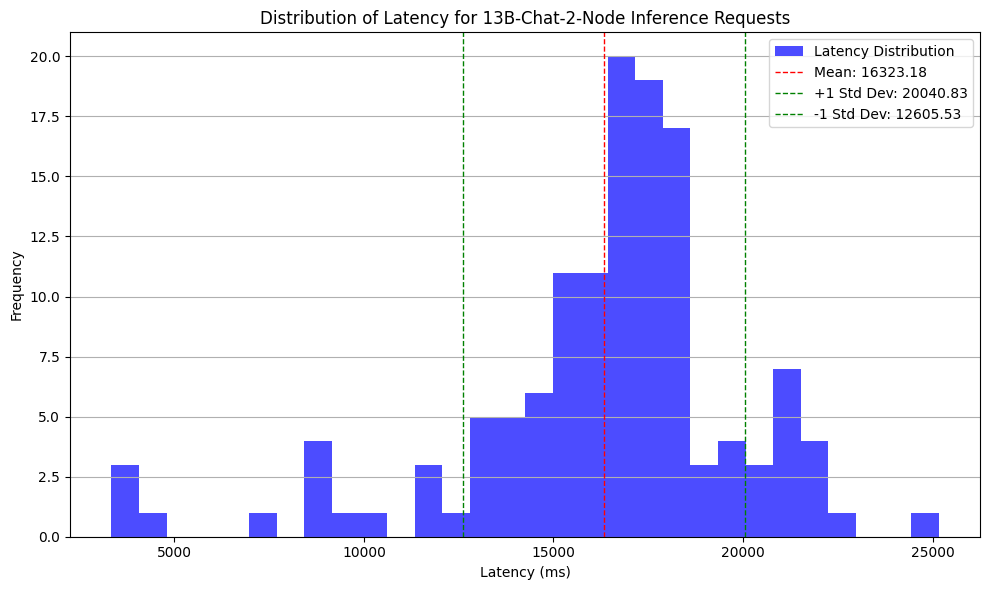

In [61]:
plot_latency_per_request(df, mean_latency, std_dev, "13B-Chat-2-Node")
plot_latency_distribution(df, mean_latency, std_dev, "13B-Chat-2-Node")

In [63]:
import matplotlib.pyplot as plt

def plot_latency_per_request(df, mean_latency, std_dev, model_name, subplot_pos):
    plt.subplot(3, 2, subplot_pos)
    plt.plot(df['request_num'], df['latency'], label='Latency', marker='o')
    plt.axhline(mean_latency, color='r', linestyle='dashed', linewidth=1, label=f'Mean: {mean_latency:.2f}')
    plt.axhline(mean_latency + std_dev, color='g', linestyle='dashed', linewidth=1, label=f'+1 Std Dev: {mean_latency + std_dev:.2f}')
    plt.axhline(mean_latency - std_dev, color='g', linestyle='dashed', linewidth=1, label=f'-1 Std Dev: {mean_latency - std_dev:.2f}')
    plt.title(f'Latency of {model_name} Inference Requests')
    plt.xlabel('Request Number')
    plt.ylabel('Latency (ms)')
    plt.legend()
    plt.grid(True)

def plot_latency_distribution(df, mean_latency, std_dev, model_name, subplot_pos): 
    plt.subplot(3, 2, subplot_pos)
    plt.hist(df['latency'], bins=30, alpha=0.7, color='blue', label='Latency Distribution')
    plt.axvline(mean_latency, color='r', linestyle='dashed', linewidth=1, label=f'Mean: {mean_latency:.2f}')
    plt.axvline(mean_latency + std_dev, color='g', linestyle='dashed', linewidth=1, label=f'+1 Std Dev: {mean_latency + std_dev:.2f}')
    plt.axvline(mean_latency - std_dev, color='g', linestyle='dashed', linewidth=1, label=f'-1 Std Dev: {mean_latency - std_dev:.2f}')
    plt.title(f'Distribution of Latency for {model_name} Inference Requests')
    plt.xlabel('Latency (ms)')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(axis='y')
    plt.tight_layout()


plt.figure(figsize=(12, 18))

# Loop through the dictionary items (key is model name, value is dataframe)
for i, (model_name, df) in enumerate(inference_dfs.items()):
    mean_latency = df['latency'].mean()
    std_dev = df['latency'].std()
    plot_latency_per_request(df, mean_latency, std_dev, model_name, i*2 + 1)
    plot_latency_distribution(df, mean_latency, std_dev, model_name, i*2 + 2)

plt.show()




ValueError: too many values to unpack (expected 2)

<Figure size 1200x1800 with 0 Axes>